In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import utils

In [29]:
stock1 = "AMZN"
stock2 = "DPZ"
spread = pd.read_csv(f"./data/spread/spread_{stock1}_{stock2}.csv", index_col=0)
spread.index = pd.to_datetime(spread.index)
ARIMA_val = pd.read_csv(f"./ARIMA/validation_result/ARIMA_{stock1}_{stock2}.csv", index_col=0)
LSTM_val = pd.read_csv(f"./LSTM_spread_forecasting/validation_result/LSTM_{stock1}_{stock2}.csv", index_col=0)
CNN_LSTM_val = pd.read_csv(f"./LSTM_spread_forecasting/validation_result/CNN_LSTM_{stock1}_{stock2}.csv", index_col=0)
print(len(spread), len(ARIMA_val), len(LSTM_val), len(CNN_LSTM_val))

2109 211 202 199


In [30]:
length = len(CNN_LSTM_val)
spread = spread.iloc[-length:]
ARIMA_val = ARIMA_val.iloc[-length:]
LSTM_val = LSTM_val.iloc[-length:]

ARIMA_val.index = spread.index
LSTM_val.index = spread.index
CNN_LSTM_val.index = spread.index
CNN_LSTM_val.head()

,0
Date,
2023-08-07,0.379999
2023-08-08,0.217510
2023-08-09,0.309298
2023-08-10,0.427415
2023-08-11,0.473826


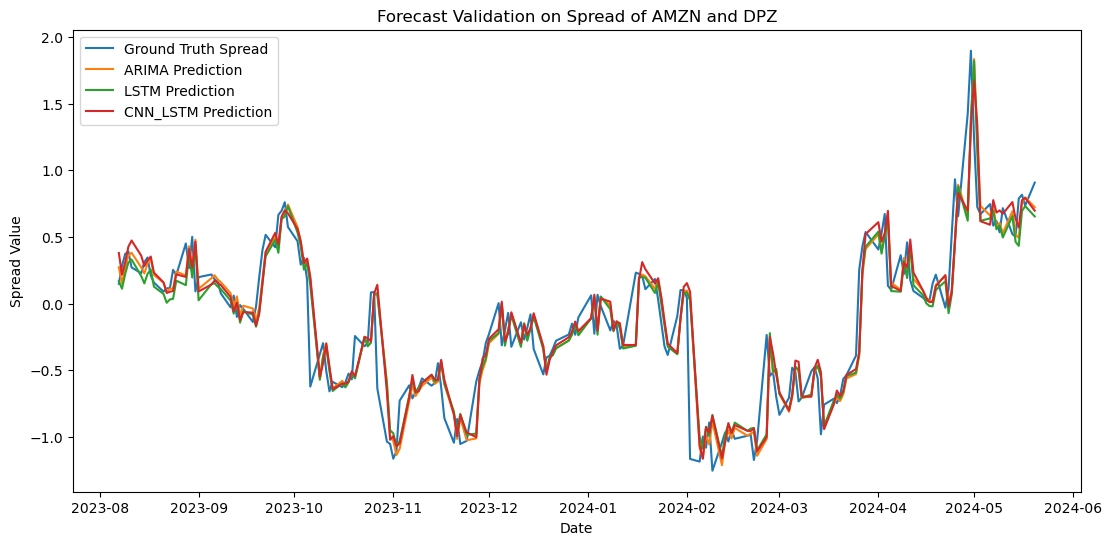

In [31]:
plt.figure(figsize=(13, 6))
plt.plot(spread, label="Ground Truth Spread")
plt.plot(ARIMA_val, label="ARIMA Prediction")
plt.plot(LSTM_val, label="LSTM Prediction")
plt.plot(CNN_LSTM_val, label="CNN_LSTM Prediction")
plt.title(f"Forecast Validation on Spread of {stock1} and {stock2}")
plt.xlabel("Date")
plt.ylabel("Spread Value")
plt.legend()
plt.show()

In [9]:
raw_data = pd.read_csv("./data/raw_data.csv", index_col=0)
raw_data.index = pd.to_datetime(raw_data.index)
raw_data.head()

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,40.689999,40.910000,26.337500,57.610001,42.930000,22.950001,101.830002,91.970001,54.439999,35.840000,...,124.980133,29.83,68.769997,35.700001,77.459999,36.080002,51.912292,98.844658,66.489998,47.270000
2016-01-05,40.549999,40.520000,25.677500,57.369999,42.919998,23.033333,102.360001,92.339996,54.040001,36.240002,...,125.839996,29.90,70.070000,36.060001,78.120003,36.070000,51.782890,100.902916,64.820000,48.009998
2016-01-06,40.730000,41.230000,25.174999,57.380001,42.560001,23.070000,102.160004,91.019997,51.740002,35.360001,...,125.839996,29.24,66.440002,36.439999,77.470001,35.619999,51.416248,101.339806,62.230000,48.020000
2016-01-07,39.000000,40.450001,24.112499,57.209999,41.540001,23.046667,99.160004,89.110001,50.419998,34.520000,...,114.949997,28.16,60.189999,36.580002,76.230003,34.700001,49.662113,99.009712,59.410000,46.560001
2016-01-08,38.590000,40.369999,24.240000,55.650002,40.669998,22.806667,98.199997,87.849998,49.980000,34.389999,...,116.620003,27.90,57.740002,36.180000,74.690002,34.369999,48.986340,98.592232,59.250000,45.880001


In [4]:
clusters = pd.read_csv("./data/cluster.csv", index_col=0)
clusters.head()

,0,1,2,optics_label,kmeans_label,dbscan_label,hierarchy_label
A,13.799941,10.532969,-1.030204,0,1,0,4
AAL,-9.694422,-9.272758,0.516964,6,14,1,1
AAPL,0.214237,18.759165,-2.062645,4,12,2,9
ABBV,17.133244,3.435651,-7.875369,2,1,0,4
ABT,12.487381,8.524612,-5.642640,-1,1,0,4


In [6]:
tickets = []
for ind in clusters.index:
    if clusters.loc[ind, "hierarchy_label"] == 1:
        tickets.append(ind)
        
print(tickets)

['AAL', 'BA', 'BKNG', 'CCL', 'CZR', 'DAL', 'DRI', 'EL', 'EXPE', 'GPC', 'HAS', 'HCA', 'HLT', 'HST', 'KDP', 'KMX', 'LUV', 'LVS', 'LYV', 'MAR', 'MGM', 'MHK', 'NCLH', 'NEM', 'NRG', 'RCL', 'SYY', 'UAL', 'UHS', 'WYNN']


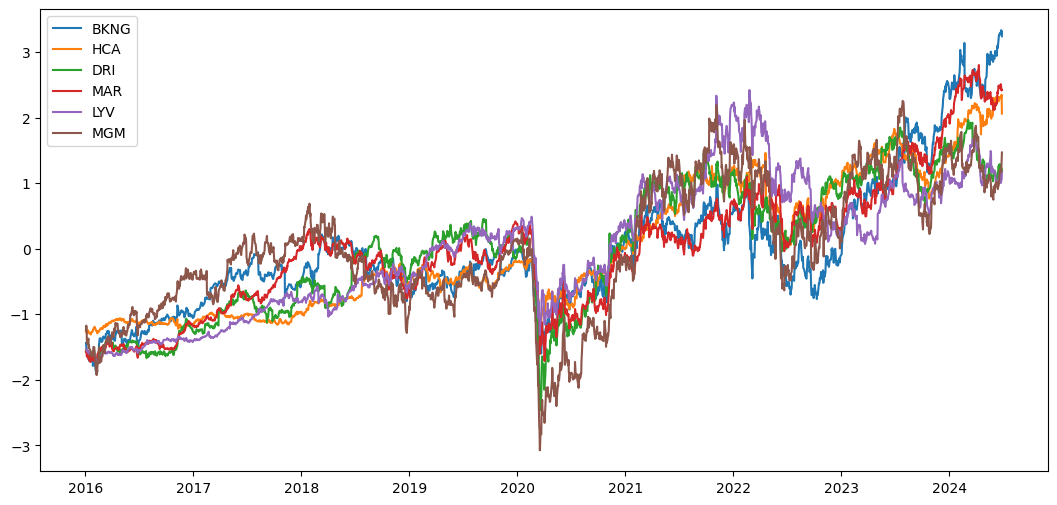

In [65]:
plt.figure(figsize=(13, 6))
plt.plot(utils.zscore_normalization(raw_data['BKNG']), label='BKNG')
plt.plot(utils.zscore_normalization(raw_data['HCA']), label='HCA')
plt.plot(utils.zscore_normalization(raw_data['DRI']), label='DRI')
plt.plot(utils.zscore_normalization(raw_data['MAR']), label='MAR')
plt.plot(utils.zscore_normalization(raw_data['LYV']), label='LYV')
plt.plot(utils.zscore_normalization(raw_data['MGM']), label='MGM')
plt.legend()
plt.show()

In [94]:
tickets = clusters[clusters['hierarchy_label'] == 3].index         
print(tickets)

Index(['ACN', 'ADP', 'APH', 'APTV', 'BALL', 'BLDR', 'BR', 'BWA', 'BX', 'CHTR',
       'CMCSA', 'CPAY', 'CTAS', 'CTSH', 'DHI', 'ECL', 'FI', 'FIS', 'GLW',
       'GPN', 'GRMN', 'IFF', 'IP', 'IT', 'JKHY', 'LEN', 'MA', 'MCD', 'MLM',
       'MNST', 'MSI', 'NVR', 'PAYX', 'PHM', 'SBUX', 'STZ', 'TMUS', 'TRMB', 'V',
       'VMC', 'VRSK', 'VRSN', 'YUM'],
      dtype='object')


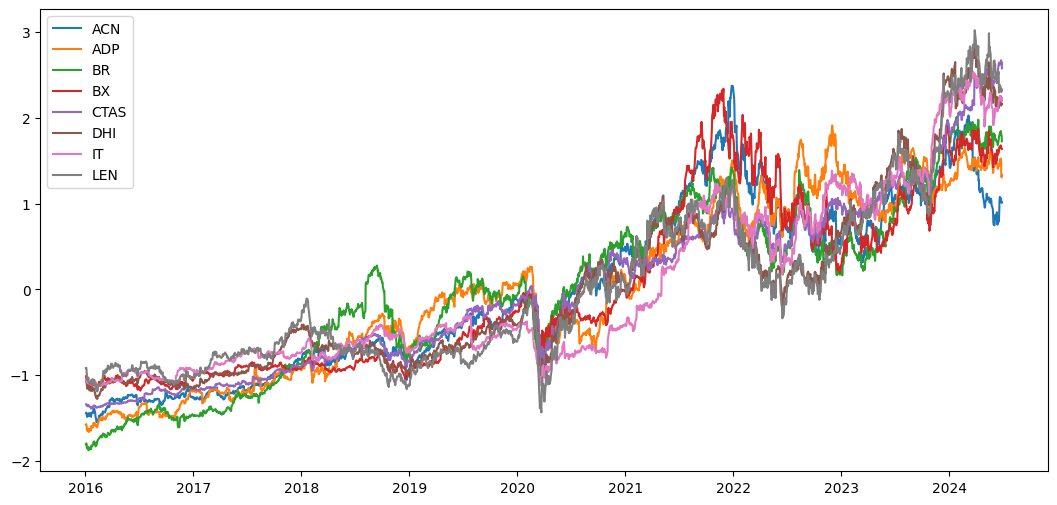

In [122]:
plt.figure(figsize=(13, 6))
plt.plot(utils.zscore_normalization(raw_data['ACN']), label='ACN')
plt.plot(utils.zscore_normalization(raw_data['ADP']), label='ADP')
plt.plot(utils.zscore_normalization(raw_data['BR']), label='BR')
plt.plot(utils.zscore_normalization(raw_data['BX']), label='BX')
plt.plot(utils.zscore_normalization(raw_data['CTAS']), label='CTAS')
plt.plot(utils.zscore_normalization(raw_data['DHI']), label='DHI')
plt.plot(utils.zscore_normalization(raw_data['IT']), label='IT')
plt.plot(utils.zscore_normalization(raw_data['LEN']), label='LEN')
plt.legend()
plt.show()